In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

movies = pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/peliculas.csv?raw=true',encoding='utf-8')
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [2]:
movies.info()
num = (movies.dtypes == float) | (movies.dtypes == int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [3]:

num_cols = []
for llave, tipo in num.items():
  if tipo == True:
    num_cols.append(llave)
print(num_cols)

['title_year', 'aspect_ratio', 'duration', 'duration.1', 'budget', 'imdb_score', 'gross']


In [4]:
movies_num=movies[num_cols]
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,1.221550e+10,9.500000,7.605058e+08


<AxesSubplot:>

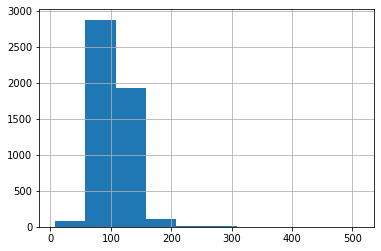

In [5]:
movies_num['duration'].hist()

In [6]:
mask = (movies_num['budget']>1e9)
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [7]:
costos=pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/thenumbers.csv?raw=true', encoding='utf-8')
costos = costos[['movie_title','production_budget','worldwide_gross']]

movies_num = pd.concat([movies_num,costos['movie_title']],axis=1)
movies_num = movies_num.loc[:,~movies_num.columns.duplicated()] 
movies_v2 = pd.merge(costos,movies_num,on='movie_title',how='left')
movies_v2.head()


,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,2007.0,2.35,169.0,169.0,300000000.0,7.1,309404152.0
2,Pirates of the Caribbean: At World's End,300000000,963420425,2015.0,2.35,148.0,148.0,245000000.0,6.8,200074175.0
3,Spectre,300000000,879620923,2012.0,2.35,164.0,164.0,250000000.0,8.5,448130642.0
4,The Dark Knight Rises,275000000,1084439099,NaN,NaN,NaN,NaN,NaN,7.1,NaN


In [8]:
help(pd.Series)

t is a superset of `xs` functionality, see
 |      :ref:`MultiIndex Slicers <advanced.mi_slicers>`.
 |      
 |      Examples
 |      --------
 |      >>> d = {'num_legs': [4, 4, 2, 2],
 |      ...      'num_wings': [0, 0, 2, 2],
 |      ...      'class': ['mammal', 'mammal', 'mammal', 'bird'],
 |      ...      'animal': ['cat', 'dog', 'bat', 'penguin'],
 |      ...      'locomotion': ['walks', 'walks', 'flies', 'walks']}
 |      >>> df = pd.DataFrame(data=d)
 |      >>> df = df.set_index(['class', 'animal', 'locomotion'])
 |      >>> df
 |                                 num_legs  num_wings
 |      class  animal  locomotion
 |      mammal cat     walks              4          0
 |             dog     walks              4          0
 |             bat     flies              2          2
 |      bird   penguin walks              2          2
 |      
 |      Get values at specified index
 |      
 |      >>> df.xs('mammal')
 |                         num_legs  num_wings
 |      animal l

In [9]:
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
False,NaN,NaN,NaN,98,161,8,8,368,NaN,574
True,4341.0,4341.0,4341.0,4243,4180,4333,4333,3973,4341.0,3767


In [10]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
False,NaN,NaN,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,4341.0,4341.0,4061,4341.0,4341.0,4341.0,4341.0,4341.0,4341.0,4341.0
